In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data_with_nans.csv')
df.head()

,Unnamed: 0,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,1,4.7,3.2,1.6,0.2,Iris-setosa
2,2,2,4.9,3.1,1.5,0.1,Iris-setosa
3,3,3,4.4,2.9,1.4,0.2,Iris-setosa
4,4,4,5.0,3.4,1.5,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     170 non-null    int64  
 1   Id             170 non-null    int64  
 2   SepalLengthCm  167 non-null    float64
 3   SepalWidthCm   169 non-null    float64
 4   PetalLengthCm  166 non-null    float64
 5   PetalWidthCm   168 non-null    float64
 6   Species        170 non-null    object 
dtypes: float64(4), int64(2), object(1)
memory usage: 9.4+ KB


In [5]:
df.columns

Index(['Unnamed: 0', 'Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm',
       'PetalWidthCm', 'Species'],
      dtype='object')

In [6]:
df = df.drop(labels=df.columns[0], axis=1)

In [7]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.7,3.2,1.6,0.2,Iris-setosa
2,2,4.9,3.1,1.5,0.1,Iris-setosa
3,3,4.4,2.9,1.4,0.2,Iris-setosa
4,4,5.0,3.4,1.5,0.2,Iris-setosa


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,170.0,84.500000,49.218899,0.0,42.25,84.5,126.75,169.0
SepalLengthCm,167.0,5.826347,0.827189,4.3,5.10,5.8,6.40,7.9
SepalWidthCm,169.0,3.072781,0.447578,2.0,2.80,3.0,3.40,4.4
PetalLengthCm,166.0,3.707229,1.789382,1.0,1.50,4.3,5.10,6.9
PetalWidthCm,168.0,1.180357,0.765049,0.1,0.30,1.3,1.80,2.5


In [9]:
df.groupby('Species').agg(['min', 'max', 'std', 'mean'])

Id                        SepalLengthCm                 \
                 min  max        std   mean           min  max       std   
Species                                                                    
Iris-setosa        0   59  17.464249   29.5           4.3  6.9  0.429014   
Iris-versicolor   60  113  15.732133   86.5           4.9  7.0  0.516189   
Iris-virginica   114  169  16.309506  141.5           4.9  7.9  0.650025   

                          SepalWidthCm                          PetalLengthCm  \
                     mean          min  max       std      mean           min   
Species                                                                         
Iris-setosa      5.034483          2.3  4.4  0.390709  3.389831           1.0   
Iris-versicolor  5.932075          2.0  4.4  0.382355  2.805556           1.5   
Iris-virginica   6.546429          2.2  3.9  0.355203  2.996429           1.3   

                                         PetalWidthCm                           
                 max       std      mean          min  max       std      mean  
Species                                                                         
Iris-setosa      5.4  0.639570  1.572414          0.1  2.1  0.295950  0.300000  
Iris-versicolor  5.1  0.623167  4.190385          0.4  1.8  0.235049  1.314815  
Iris-virginica   6.9  0.795195  5.469643          0.4  2.5  0.353215  1.992727

In [10]:
df.isna().sum()

Id               0
SepalLengthCm    3
SepalWidthCm     1
PetalLengthCm    4
PetalWidthCm     2
Species          0
dtype: int64

In [11]:
non_percentage = df.isna().sum() / df.count() * 100
non_percentage

Id               0.000000
SepalLengthCm    1.796407
SepalWidthCm     0.591716
PetalLengthCm    2.409639
PetalWidthCm     1.190476
Species          0.000000
dtype: float64

In [12]:
for column in df.columns[1: -1]:
    df[column].fillna(value=df[column].mean(), inplace=True)

In [13]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [14]:
df['SepalLengthCm']

0      5.1
1      4.7
2      4.9
3      4.4
4      5.0
      ... 
165    5.7
166    6.8
167    6.4
168    7.2
169    6.3
Name: SepalLengthCm, Length: 170, dtype: float64

Text(0.5, 0, 'id')

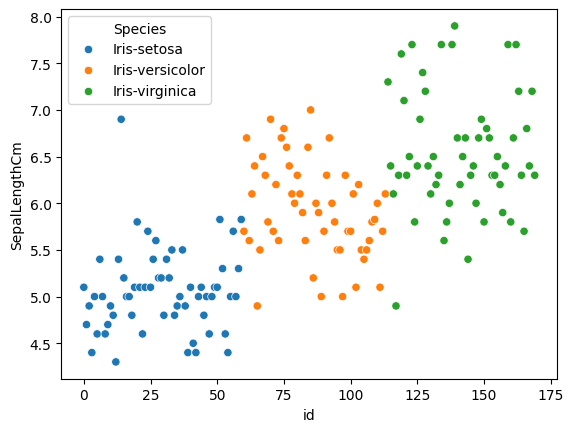

In [15]:
sns.scatterplot(data=df, x=df.index, y='SepalLengthCm', hue='Species')
plt.xlabel('id')

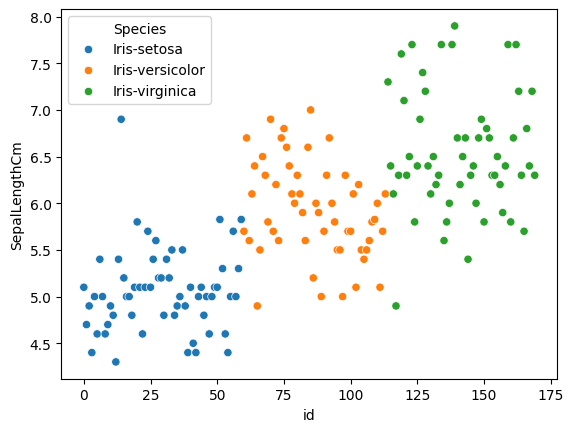

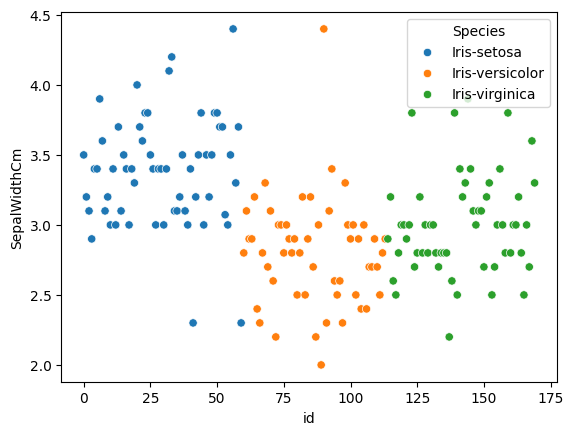

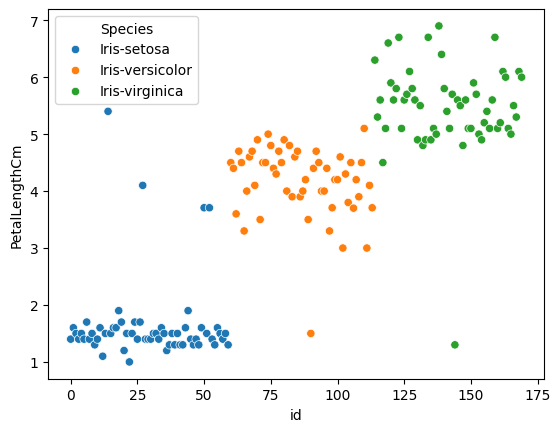

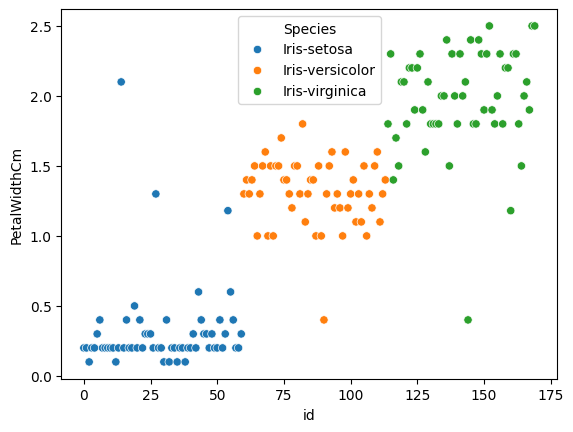

In [16]:
for column in df.columns[1: -1]:
    sns.scatterplot(data=df, x=df.index, y=column, hue='Species')
    plt.xlabel('id')
    plt.show()

In [17]:
df.corr(numeric_only=True)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.694009,-0.339216,0.838236,0.863317
SepalLengthCm,0.694009,1.000000,-0.100699,0.859938,0.806403
SepalWidthCm,-0.339216,-0.100699,1.000000,-0.388208,-0.351993
PetalLengthCm,0.838236,0.859938,-0.388208,1.000000,0.945563
PetalWidthCm,0.863317,0.806403,-0.351993,0.945563,1.000000


<Axes: >

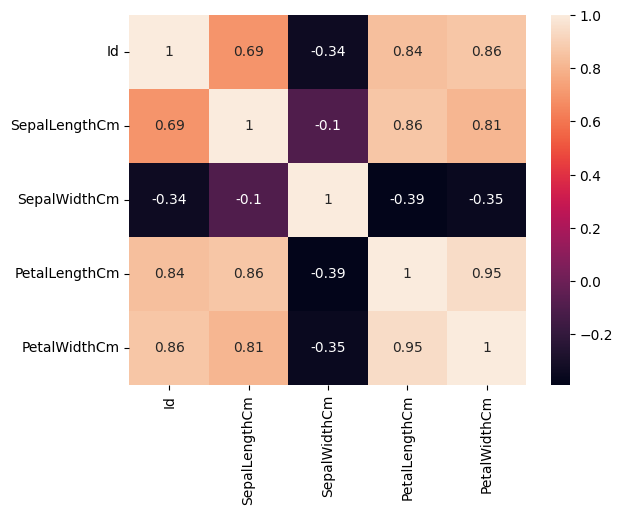

In [18]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [19]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [20]:
selected_spec = df[df['Species'] == 'Iris-setosa']
selected_column = selected_spec['SepalLengthCm']

In [21]:
std = selected_column.std()
avg = selected_column.mean()

In [22]:
three_sigma_plus = avg + (3 * std)
three_sigma_minus = avg - (3 * std)

In [23]:
three_sigma_plus

6.397012123414941

In [24]:
three_sigma_minus

3.724744363611008

In [25]:
selected_column[((selected_spec['SepalLengthCm'] > three_sigma_plus) | (selected_spec['SepalLengthCm'] < three_sigma_minus))].index

Index([14], dtype='int64')

In [26]:
for column in df.columns[1: -1]:
    for spec in df['Species'].unique():
        selected_spec = df[df['Species'] == spec]
        selected_column = selected_spec[column]
        
        std = selected_column.std()
        avg = selected_column.mean()
        
        three_sigma_minus = avg - (3 * std)
        three_sigma_plus = avg + (3 * std)
        
        outliers = selected_column[((selected_spec[column] > three_sigma_plus) | (selected_spec[column] < three_sigma_minus))].index
        df.drop(labels=outliers, inplace=True)
        
        print(spec, column, outliers)

Iris-setosa SepalLengthCm Index([14], dtype='int64')
Iris-versicolor SepalLengthCm Index([], dtype='int64')
Iris-virginica SepalLengthCm Index([], dtype='int64')
Iris-setosa SepalWidthCm Index([], dtype='int64')
Iris-versicolor SepalWidthCm Index([90], dtype='int64')
Iris-virginica SepalWidthCm Index([], dtype='int64')
Iris-setosa PetalLengthCm Index([27, 50, 52], dtype='int64')
Iris-versicolor PetalLengthCm Index([], dtype='int64')
Iris-virginica PetalLengthCm Index([144], dtype='int64')
Iris-setosa PetalWidthCm Index([54], dtype='int64')
Iris-versicolor PetalWidthCm Index([], dtype='int64')
Iris-virginica PetalWidthCm Index([], dtype='int64')


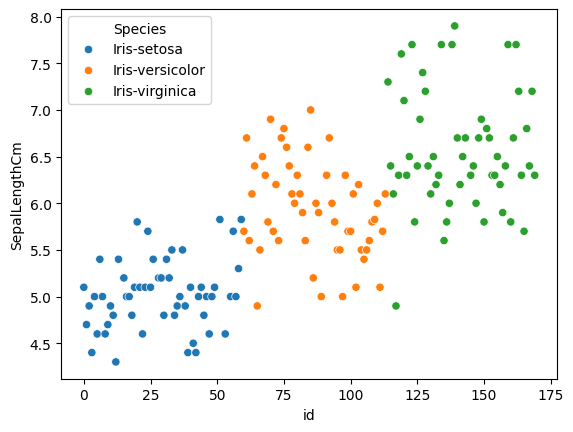

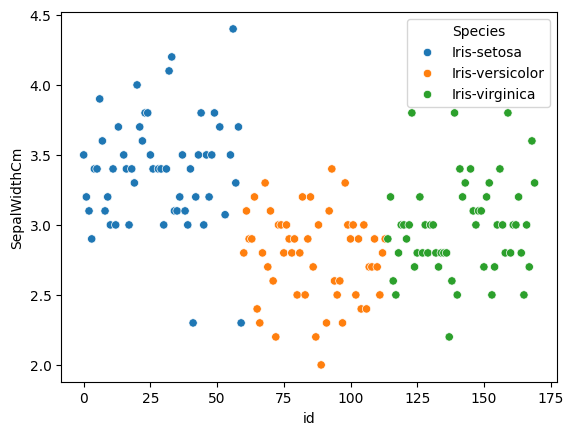

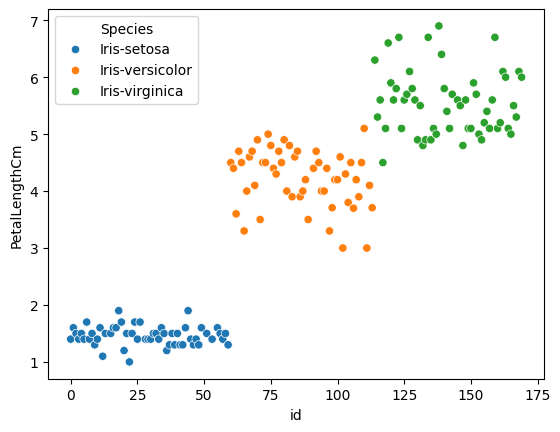

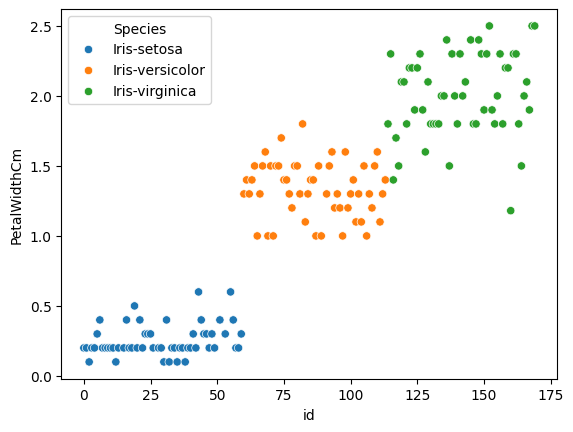

In [27]:
for column in df.columns[1: -1]:
    sns.scatterplot(data=df, x=df.index, y=column, hue='Species')
    plt.xlabel('id')
    plt.show()

#### IQR - Quantile

In [28]:
for column in df.columns[1: -1]:
    for spec in df['Species'].unique():
        selected_spec = df[df['Species'] == spec]
        selected_column = selected_spec[column]
        
        q1 = selected_column.quantile(0.25)
        q3 = selected_column.quantile(0.75)
        
        iqr = q3 - q1 
        min = q1 - (1.5 * iqr)
        max = q3 + (1.5 * iqr)
        
        print(spec, column,"| min=", min, "| max=", max)
        
        max_index = df[(df['Species'] == spec) & (df[column] > max)].index
        print(max_index)
        
        #min_index = selected_column[((selected_spec[column] < min))].index
        #print(min_index)
        
        min_index = df[(df['Species'] == spec) & (df[column] < min)].index
        print(min_index)
        
        df.drop(index=max_index, inplace=True)
        df.drop(index=min_index, inplace=True)

Iris-setosa SepalLengthCm | min= 4.199999999999999 | max= 5.800000000000001
Index([51, 59], dtype='int64')
Index([], dtype='int64')
Iris-versicolor SepalLengthCm | min= 4.549999999999999 | max= 7.35
Index([], dtype='int64')
Index([], dtype='int64')
Iris-virginica SepalLengthCm | min= 5.15 | max= 7.950000000000001
Index([], dtype='int64')
Index([117], dtype='int64')
Iris-setosa SepalWidthCm | min= 2.35 | max= 4.35
Index([56], dtype='int64')
Index([41], dtype='int64')
Iris-versicolor SepalWidthCm | min= 1.75 | max= 3.75
Index([], dtype='int64')
Index([], dtype='int64')
Iris-virginica SepalWidthCm | min= 2.1999999999999993 | max= 3.8000000000000007
Index([], dtype='int64')
Index([], dtype='int64')
Iris-setosa PetalLengthCm | min= 1.0999999999999996 | max= 1.9000000000000004
Index([], dtype='int64')
Index([22], dtype='int64')
Iris-versicolor PetalLengthCm | min= 2.8500000000000005 | max= 5.6499999999999995
Index([], dtype='int64')
Index([], dtype='int64')
Iris-virginica PetalLengthCm | min

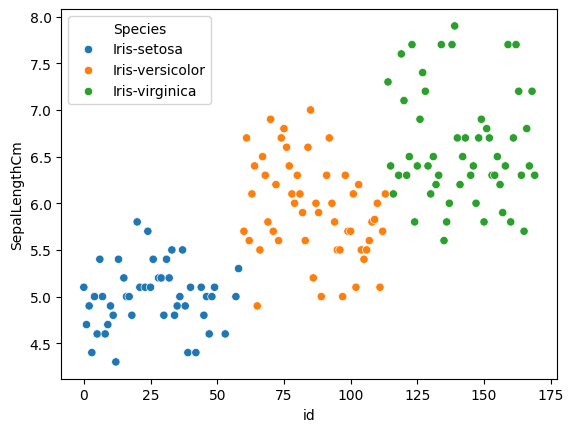

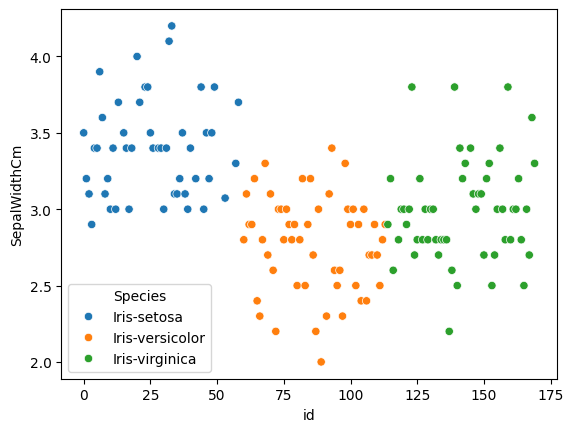

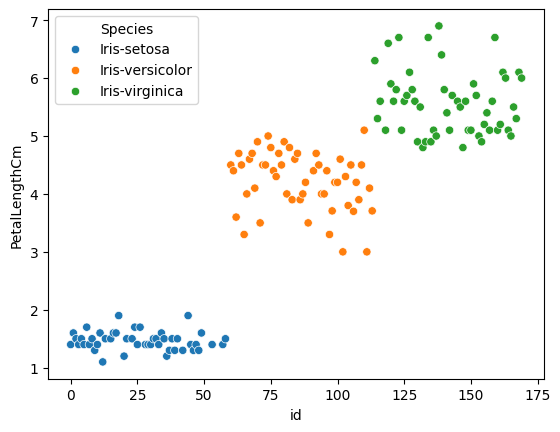

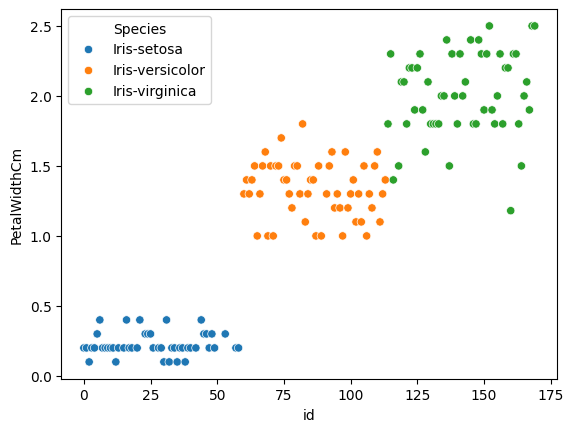

In [29]:
for column in df.columns[1: -1]:
    sns.scatterplot(data=df, x=df.index, y=column, hue='Species')
    plt.xlabel("id")
    plt.show()

In [30]:
df.to_csv('iris_scaled.csv', index=False)

In [31]:
df.drop(labels='Id', axis=1, inplace=True)

In [32]:
label_encoder = LabelEncoder()

In [33]:
df['Species'] = label_encoder.fit_transform(df['Species'])

In [34]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.7,3.2,1.6,0.2,0
2,4.9,3.1,1.5,0.1,0
3,4.4,2.9,1.4,0.2,0
4,5.0,3.4,1.5,0.2,0


In [35]:
X_train, X_test, y_train, y_test =train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.2, random_state=42)

In [36]:
y_train.value_counts()

Species
2    44
1    43
0    36
Name: count, dtype: int64

In [37]:
y_test.value_counts()

Species
0    11
1    10
2    10
Name: count, dtype: int64

In [38]:
xgb_cls = xgb.XGBClassifier(objective='multiclass:softmax', num_class=3)

In [39]:
xgb_cls.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)

In [40]:
preds = xgb_cls.predict(X_test)

In [41]:
preds

array([0, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 0, 2, 1, 1, 2, 0, 0, 2, 0, 0,
       2, 1, 2, 0, 2, 0, 1, 1, 2])

In [42]:
np.array(y_test)

array([0, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 0, 2, 1, 1, 2, 0, 0, 2, 0, 0,
       2, 1, 2, 0, 1, 0, 1, 1, 2])

In [43]:
accuracy_score(y_test, preds)

0.967741935483871

In [44]:
confusion_matrix(y_test, preds)

array([[11,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 10]])

<Axes: >

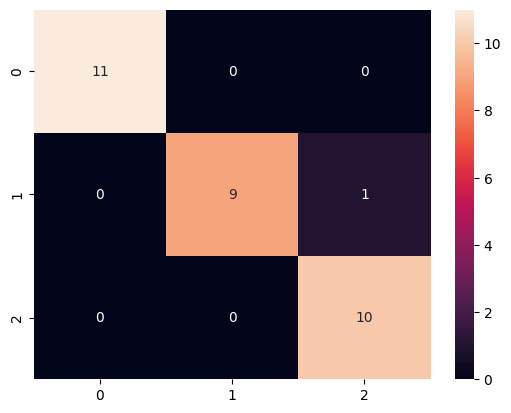

In [45]:
sns.heatmap(confusion_matrix(y_test, preds), annot=True)